In [ ]:
# %%capture
!git clone https://github.com/karaposu/HDILOM.git
%cd HDILOM/experimental_notebooks/head_segmentation




Cloning into 'HDILOM'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 149 (delta 0), reused 10 (delta 0), pack-reused 139
Receiving objects: 100% (149/149), 136.80 MiB | 29.84 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (130/130), done.
/content/HDILOM/experimental_notebooks/head_segmentation


# Imports

In [ ]:
from typing import List
from typing import Dict
import itertools
# import torch
import cv2
import numpy
from google.colab.patches import cv2_imshow

import pathlib
import functools

# import torch
# from torchvision import transforms
from google.colab.patches import cv2_imshow


import matplotlib.pyplot as plt

from PIL import Image as im
import cv2
import numpy as np
import skimage.exposure

# Helper Functions

In [ ]:
def FD(img):
 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detector = cv2.CascadeClassifier("/content/HDILOM/experimental_notebooks/head_segmentation/haarcascade_frontalface_default.xml")
    faces = detector.detectMultiScale(gray, 1.1, 4)
    return faces[0]

In [ ]:

def conv_to_hsv(np_array):
   np_array= np.expand_dims(np_array, axis=0)
   np_array= np.expand_dims(np_array, axis=0)
   np_array=np_array.astype('uint8')
   hsv_color=cv2.cvtColor(np_array, cv2.COLOR_RGB2HSV)
  
   return hsv_color


In [ ]:
def bg_color_Detection(img,offset ):
        
       
        left_up_corner_point=(offset, offset) 
        left_down_corner_point=(img.shape[0]-offset, offset )
        right_up_corner_point= (offset,img.shape[1]-offset ) 
        right_down_corner_point=(img.shape[0]-offset , img.shape[1]-offset ) 

        sample_left_up_corner=img[left_up_corner_point].astype('int16')
        sample_left_down_corner=img[left_down_corner_point].astype('int16')
        sample_right_up_corner=img[right_up_corner_point].astype('int16')
        sample_right_down_corner=img[right_down_corner_point].astype('int16')

      
        print("RGB:",sample_left_up_corner, "HSV:", conv_to_hsv(sample_left_up_corner))
        print("RGB:",sample_left_down_corner, "HSV:", conv_to_hsv(sample_left_down_corner))
        print("RGB:",sample_right_up_corner, "HSV:", conv_to_hsv(sample_right_up_corner))
        print("RGB:",sample_right_down_corner, "HSV:", conv_to_hsv(sample_right_down_corner))
           

        avg_R= int(( sample_left_up_corner[0]+  sample_left_down_corner[0]+ sample_right_up_corner[0]+  sample_right_down_corner[0] )/4)
        avg_B= int(( sample_left_up_corner[1]+  sample_left_down_corner[1]+ sample_right_up_corner[1]+  sample_right_down_corner[1] )/4)
        avg_G= int(( sample_left_up_corner[2]+  sample_left_down_corner[2]+ sample_right_up_corner[2]+  sample_right_down_corner[2] )/4)
        avarage_bg_color = (avg_R, avg_B,avg_G)
        
        print('hsv:')

        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        sample_left_up_corner=hsv[left_up_corner_point].astype('int16')
        sample_left_down_corner=hsv[left_down_corner_point].astype('int16')
        sample_right_up_corner=hsv[right_up_corner_point].astype('int16')
        sample_right_down_corner=hsv[right_down_corner_point].astype('int16')
        
        print(sample_left_up_corner)
        print(sample_left_down_corner)
        print(sample_right_up_corner)
        print(sample_right_down_corner)

        avg_H= int(( sample_left_up_corner[0]+  sample_left_down_corner[0]+ sample_right_up_corner[0]+  sample_right_down_corner[0] )/4)
        avg_S= int(( sample_left_up_corner[1]+  sample_left_down_corner[1]+ sample_right_up_corner[1]+  sample_right_down_corner[1] )/4)
        avg_V= int(( sample_left_up_corner[2]+  sample_left_down_corner[2]+ sample_right_up_corner[2]+  sample_right_down_corner[2] )/4)
        avarage_bg_hsv_color = (avg_H, avg_S,avg_V)

        print(avarage_bg_hsv_color)

        

        return avarage_bg_color

# bg_color_Detection(testimg4,50 )

#Load Test images

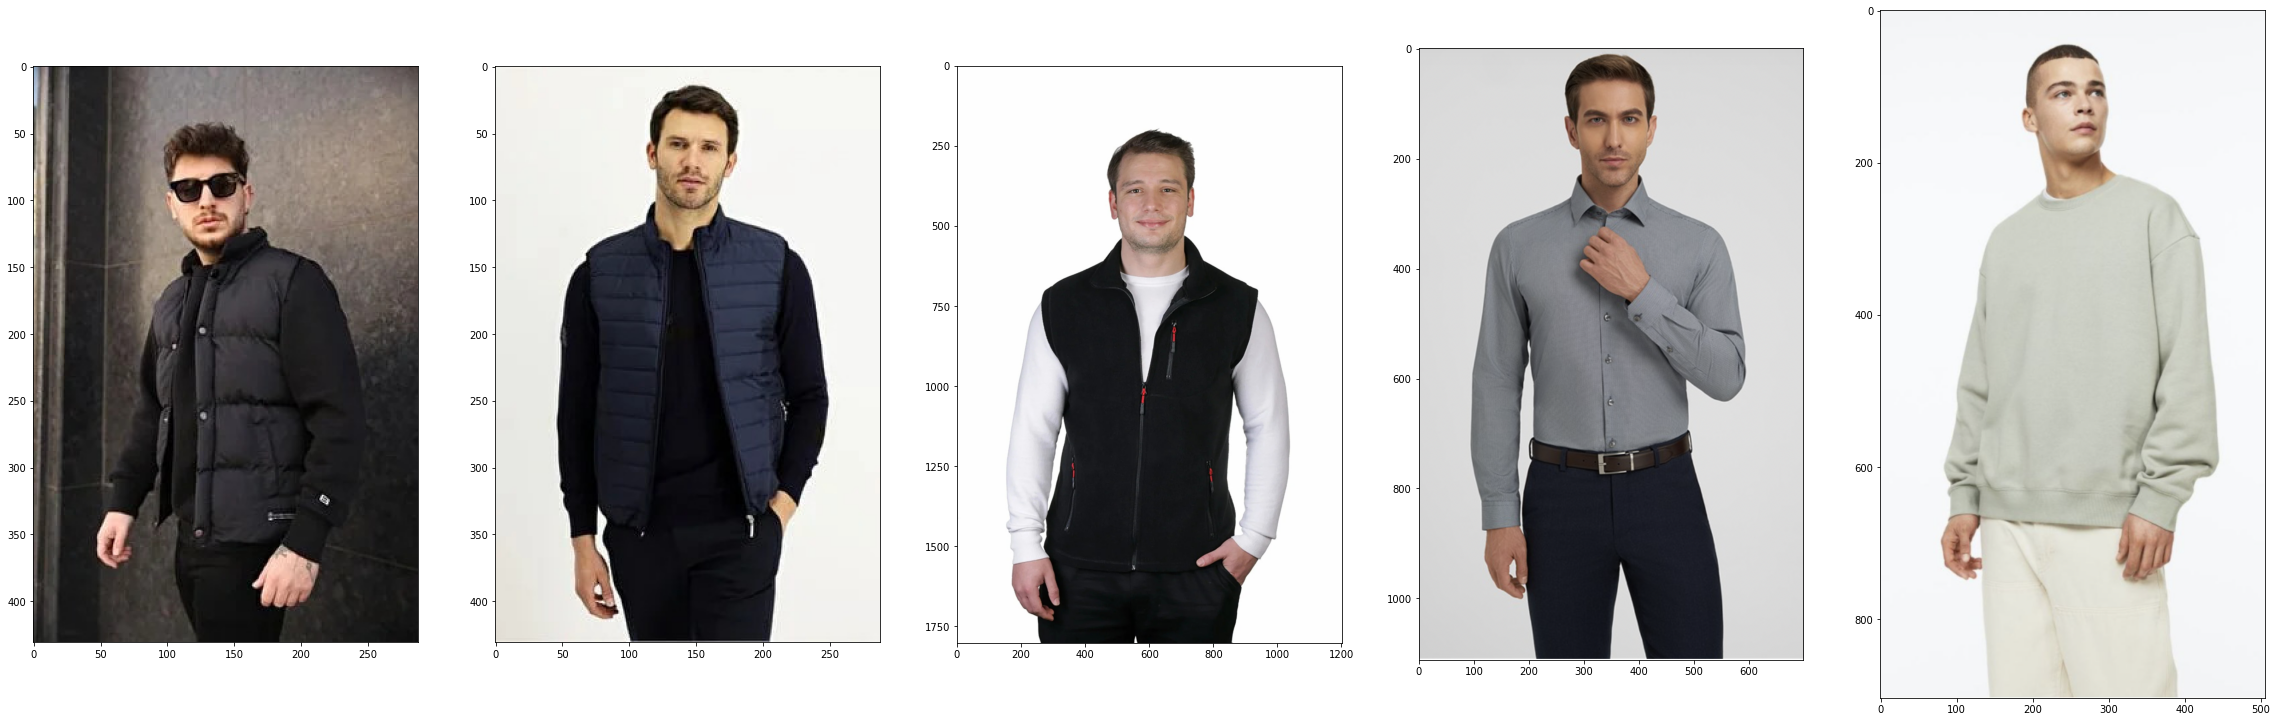

In [ ]:
image_path1 ="testimg1.jpg"
testimg1 = cv2.imread(image_path1,cv2.IMREAD_UNCHANGED)
testimg1 = cv2.cvtColor(testimg1,cv2.COLOR_BGR2RGB)

image_path2 ="testimg2.jpg"
testimg2 = cv2.imread(image_path2,cv2.IMREAD_UNCHANGED)
testimg2 = cv2.cvtColor(testimg2,cv2.COLOR_BGR2RGB)

image_path3 ="testimg3.jpg"
testimg3 = cv2.imread(image_path3,cv2.IMREAD_UNCHANGED)
testimg3 = cv2.cvtColor(testimg3,cv2.COLOR_BGR2RGB)

image_path4 ="testimg4.png"
testimg4 = cv2.imread(image_path4,cv2.IMREAD_UNCHANGED)

testimg4 = cv2.cvtColor(testimg4,cv2.COLOR_BGR2RGB)

image_path5 ="testimg5.png"
testimg5 = cv2.imread(image_path5,cv2.IMREAD_UNCHANGED)
testimg5 = cv2.cvtColor(testimg5,cv2.COLOR_BGR2RGB)


# print(testimg1.shape)
# print(testimg2.shape)
# print(testimg3.shape)
# print(testimg4.shape)
# print(testimg5.shape)

f, axarr = plt.subplots(1,5,figsize=(40, 20))
# plt.rcParams["figure.figsize"] = (20,3)
# f.set_size_inches(100.5, 10.5, forward=True)
axarr[0].imshow(testimg1)
axarr[1].imshow(testimg2)
axarr[2].imshow(testimg3)
axarr[3].imshow(testimg4)
axarr[4].imshow(testimg5)


a=5

    


In [ ]:
a=np.uint8([[[222,220,220]]])
z=cv2.cvtColor(a, cv2.COLOR_RGB2HSV)




[[[222 220 220]]]
(1, 1, 3)
uint8
<class 'numpy.ndarray'>
[[[  0   2 222]]]
 


# Background Color Filtering (HSV)

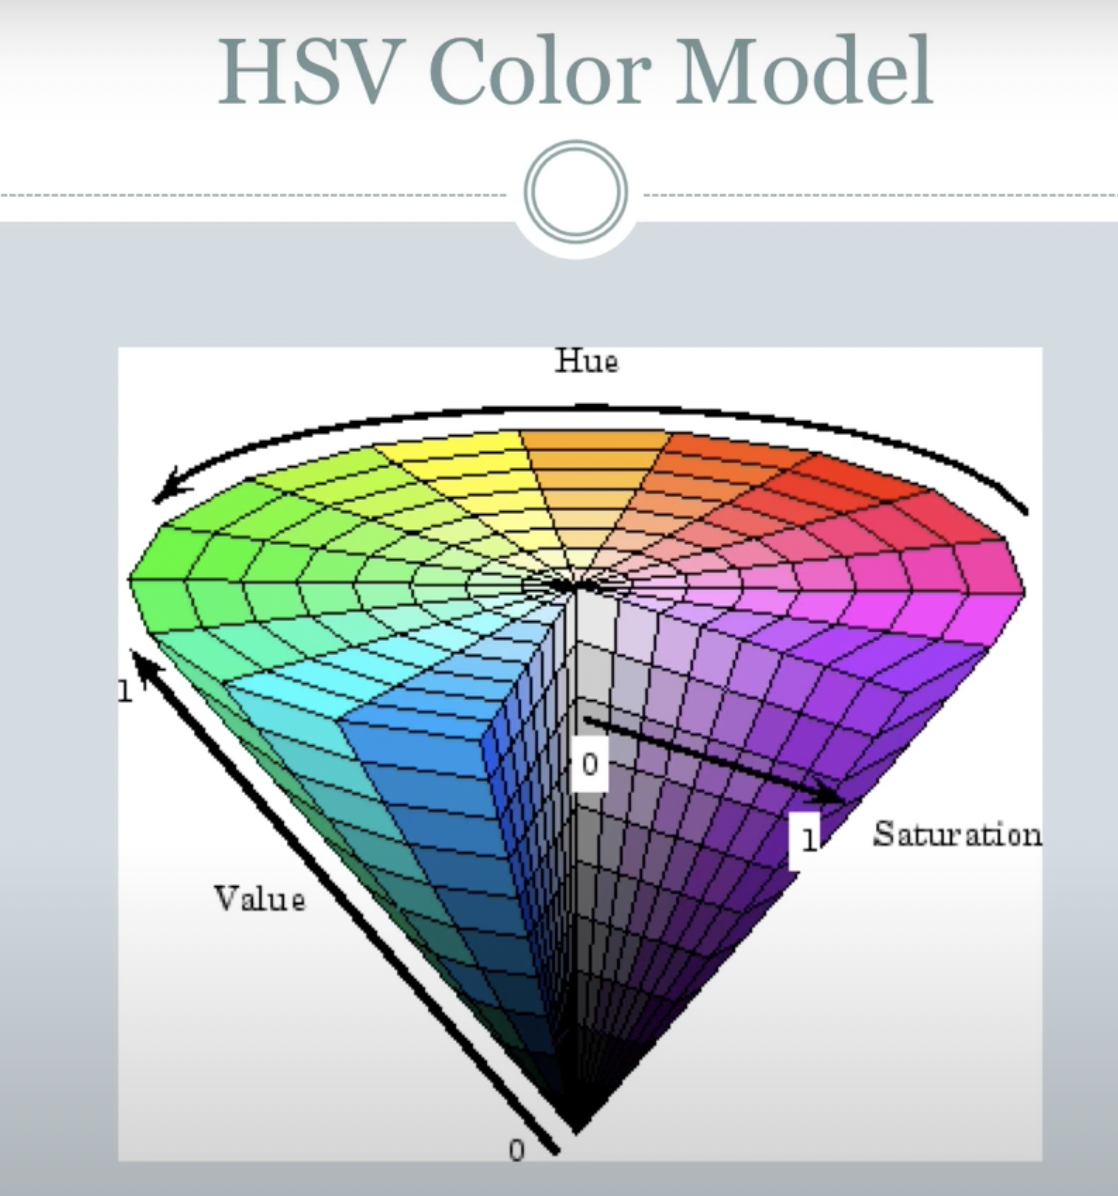

In [ ]:
image_path1 ="/content/HDILOM/experimental_notebooks/head_segmentation/hsv.png"
hsv_guide = cv2.imread(image_path1,cv2.IMREAD_UNCHANGED)
cv2_imshow(hsv_guide)

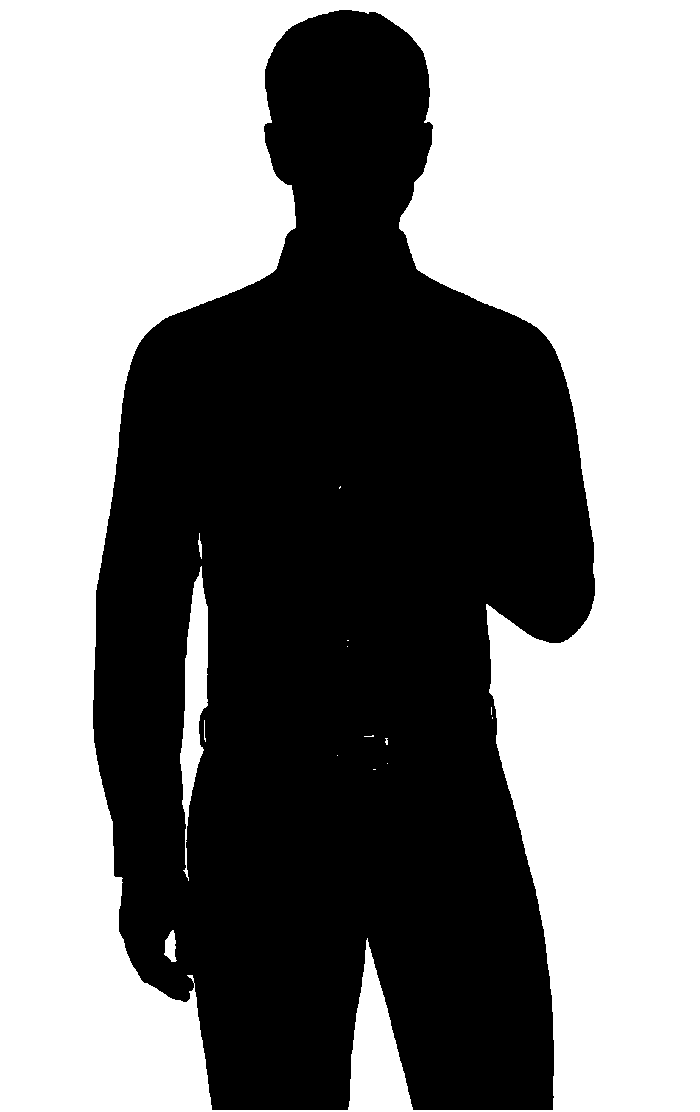

In [ ]:



#  the grey pixels are characterised by having Saturation of zero or very close to zero,
#  so that test will discriminate black through grey to white pixels. Then the Value/Lightness
#  will tell you how far along the scale from black to white they actually are, low Lightness/Value 
# is dark grey whereas high Lightness/Value means light grey.

# sensitivity=50
# lower = np.array([0,0,255-sensitivity])
         
# upper = np.array([255,sensitivity,255])

def create_mask_using_bg_color(img):
         hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

         sensitivity=50
         lower = np.array([0,0,255-sensitivity])
         
         upper = np.array([255,sensitivity,255])

       
         mask = cv2.inRange(hsv, lower, upper)
        #  mask = cv2.bitwise_not(mask)

         return mask  

mask=create_mask_using_bg_color(testimg4)
cv2_imshow(mask)



In [ ]:
# import numpy as np
# import cv2 as cv
# im = cv.imread(image_path)
# imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(imgray, 127, 255, 0)
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# GrapeCut

[266  63 175 175]


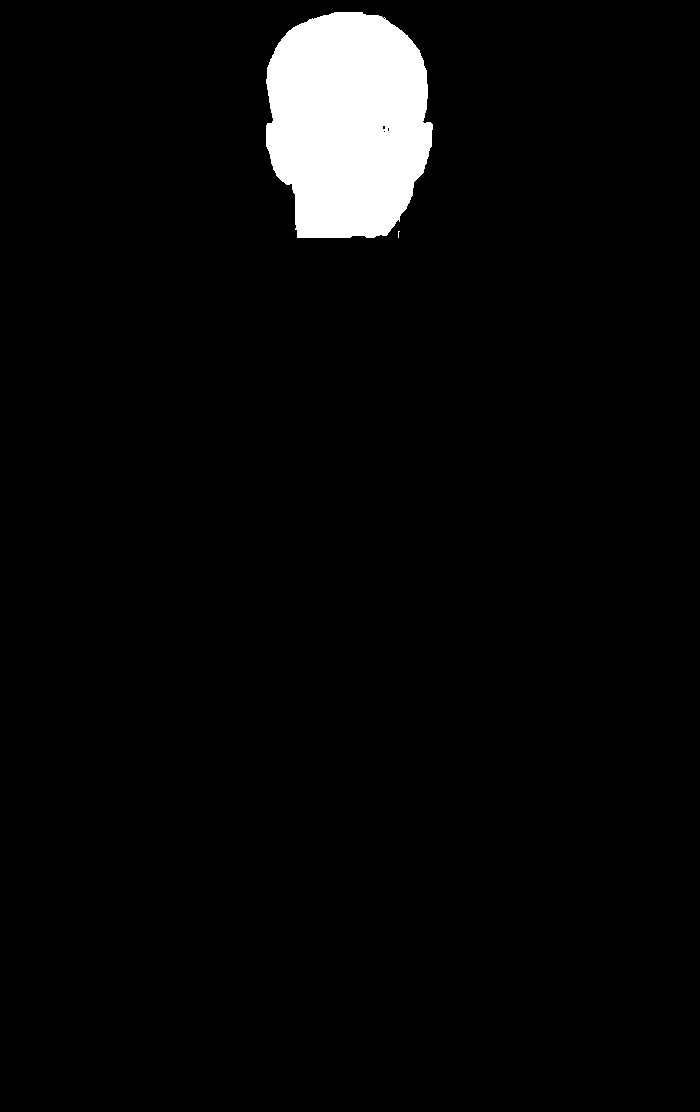

In [ ]:
def grabcut_head_selection_mask(original_image, bounding_box):
    
    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    y= y- int(height/3)
    height= height +int(height/3)
    
    
   
    segment[y:y+height, x:x+width] = 1
    
    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv2.grabCut(original_image, segment, (x,y,width,height), background_mdl, foreground_mdl, 5,
    cv2.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,255).astype('uint8')

    # original_image = original_image*new_mask[:,:,np.newaxis]

    # cv2_imshow( original_image)
    cv2_imshow( new_mask)

    return new_mask


boundingbox= FD(testimg4)
print(boundingbox)
x,y,width,height=boundingbox
grabcut_head_selection_mask(testimg4, boundingbox)

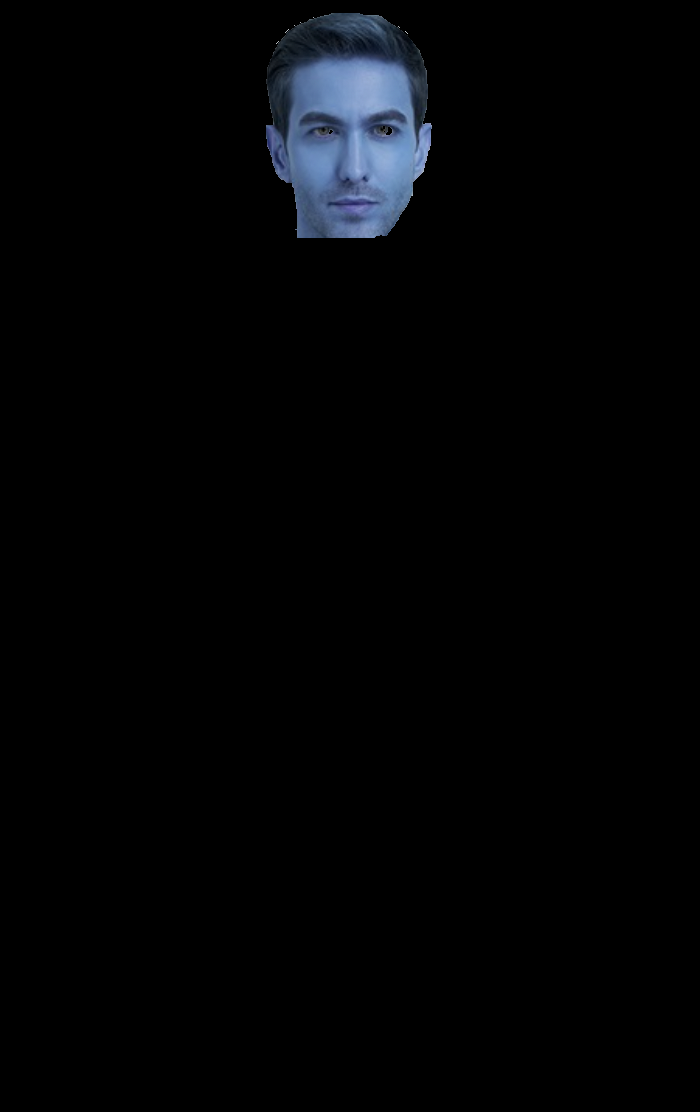

In [ ]:
def grabcut_algorithm(original_image, bounding_box):
    
    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    # x=x-100
    height=height+100
    segment[y:y+height, x:x+width] = 1
    
    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv2.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5,
    cv2.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')

    original_image = original_image*new_mask[:,:,np.newaxis]

    cv2_imshow( original_image)

boundingbox= FD(testimg4)
x,y,width,height=boundingbox
grabcut_algorithm(testimg4, (x,y-50,width,height+50))

##basic test 